<div style="background-color:#000;"><img src="pqn.png"></img></div>

In [1]:
import pandas as pd
import riskfolio as rp
import yfinance as yf

### Download historical price data and calculate returns

We first define the date range and the list of asset tickers. This allows us to decide which assets and time period we are interested in analyzing.

In [2]:
start = "2016-01-01"
end = "2019-12-30"

assets = [
    "JCI", "TGT", "CMCSA", "CPB", "MO", "APA", "MMC", "JPM", "ZION",
    "PSA", "BAX", "BMY", "LUV", "PCAR", "TXT", "TMO", "DE", "MSFT",
    "HPQ", "SEE", "VZ", "CNP", "NI", "T", "BA"
]

prices = yf.download(assets, start=start, end=end)["Adj Close"]
returns = prices.pct_change().dropna()

[*********************100%***********************]  25 of 25 completed


We download historical price data for the specified assets over the chosen date range. After downloading, we calculate daily returns from the adjusted closing prices of each asset.

We use Yahoo Finance to obtain the adjusted closing prices for our assets over the specified period. The percentage change function calculates daily returns from these prices. Dropping missing values ensures we have a clean dataset for analysis.

### Create a portfolio and calculate optimal allocation

Next, we create a portfolio object using the calculated returns. This portfolio will be used to perform optimization and calculate the optimal allocation of assets.

In [3]:
port = rp.Portfolio(returns=returns)

port.assets_stats(method_mu="hist", method_cov="ledoit")
port.lowerret = 0.00056488 * 1.5

model = "Classic"
rm = "MV"

w_rp = port.rp_optimization(model=model, rm=rm)

We calculate the expected returns and covariance matrix of the portfolio, using historical data and the Ledoit-Wolf shrinkage method for covariance. We also set a target return for the portfolio.

We use historical data to estimate expected returns and the Ledoit-Wolf method for a more stable covariance matrix. Setting a lower target return helps guide the optimization process to achieve a desired level of return.

We then define the optimization model and risk measure. These parameters guide how the portfolio optimization will be carried out.

We estimate the optimal portfolio allocation using risk parity optimization. This step uses the previously defined model and risk measure to determine how much of each asset should be included in the portfolio.

We use the "Classic" model which seeks to balance the risk of the portfolio using Mean-Variance ("MV") optimization. The optimization process calculates optimal asset weights to minimize risk while achieving the desired return.

### Define constraints and re-optimize the portfolio

We create a DataFrame to categorize assets by their industry. This categorization will be used to apply constraints during portfolio optimization.

In [4]:
asset_classes = {
    "Assets": assets,
    "Industry": [
        "Consumer Discretionary", "Consumer Discretionary", "Consumer Discretionary",
        "Consumer Staples", "Consumer Staples", "Energy", "Financials", "Financials",
        "Financials", "Financials", "Health Care", "Health Care", "Industrials",
        "Industrials", "Industrials", "Health Care", "Industrials",
        "Information Technology", "Information Technology", "Materials",
        "Telecommunications Services", "Utilities", "Utilities",
        "Telecommunications Services", "Financials"
    ]
}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=["Assets"])

constraints = {
    "Disabled": [False, False, False, False, False],
    "Type": ["All Assets", "Classes", "Classes", "Classes", "Classes"],
    "Set": ["", "Industry", "Industry", "Industry", "Industry"],
    "Position": ["", "Financials", "Utilities", "Industrials", "Consumer Discretionary"],
    "Sign": ["<=", "<=", "<=", "<=", "<="],
    "Weight": [0.10, 0.2, 0.2, 0.2, 0.2],
    "Type Relative": ["", "", "", "", ""],
    "Relative Set": ["", "", "", "", ""],
    "Relative": ["", "", "", "", ""],
    "Factor": ["", "", "", "", ""]
}

constraints = pd.DataFrame(constraints)

A, B = rp.assets_constraints(constraints, asset_classes)

port.ainequality = A
port.binequality = B

w_rp = port.rp_optimization(model=model, rm=rm)

We convert the asset classes into a sorted DataFrame. This makes it easier to apply and manage constraints based on industry classifications.

We define constraints for the optimization process, specifying limits on the weight of certain asset classes. This helps ensure the portfolio is diversified across different industries.

We convert the constraints into a DataFrame, which is used to set inequality constraints for the portfolio optimization.

We define asset constraints using the specified constraints and asset classes. These constraints are then applied to the portfolio optimization process.

We set the portfolio's inequality constraints using the matrices derived from our constraints. We re-run the portfolio optimization to account for these new constraints.

The constraints are implemented as inequality constraints in the portfolio optimization. By re-running the optimization, we ensure the asset allocations adhere to the constraints while still aiming to minimize risk.

### Visualize the optimal portfolio allocation and risk contribution

We visualize the optimal portfolio allocation using a pie chart. This helps us understand the distribution of asset weights in the optimized portfolio.

<Axes: title={'center': 'Portfolio Composition'}>

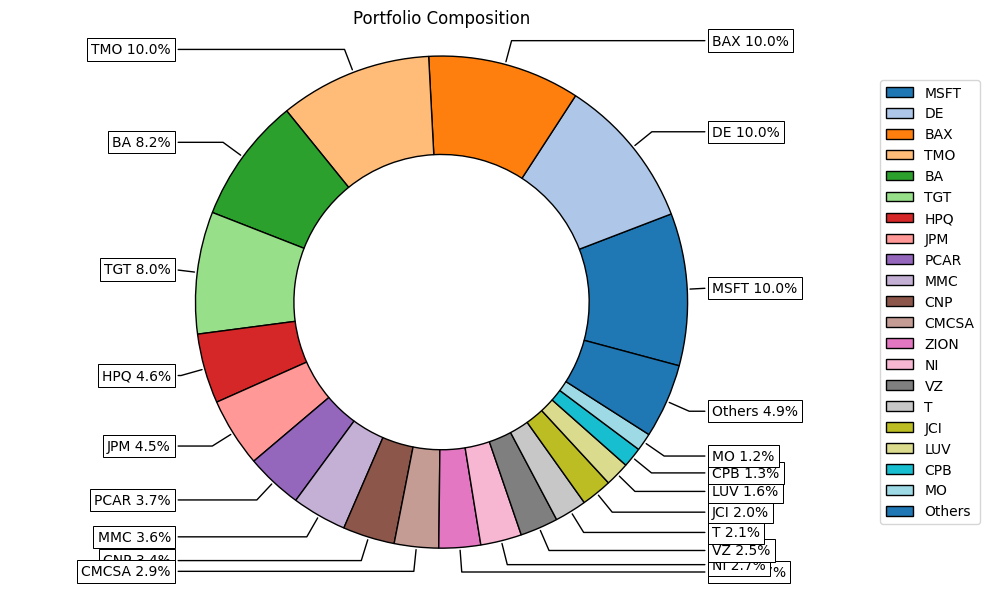

In [5]:
rp.plot_pie(
    w=w_rp, 
    others=0.05,
    nrow=25,
    height=6,
    width=10
)

The pie chart displays how assets are weighted in the optimal portfolio, highlighting diversification. By setting a threshold for "others," we group smaller allocations into a single category to simplify the visualization.

We visualize the risk contribution of each asset in the portfolio. This shows how much each asset contributes to the overall portfolio risk.

<Axes: title={'center': 'Risk (Standard Deviation) Contribution per Asset'}>

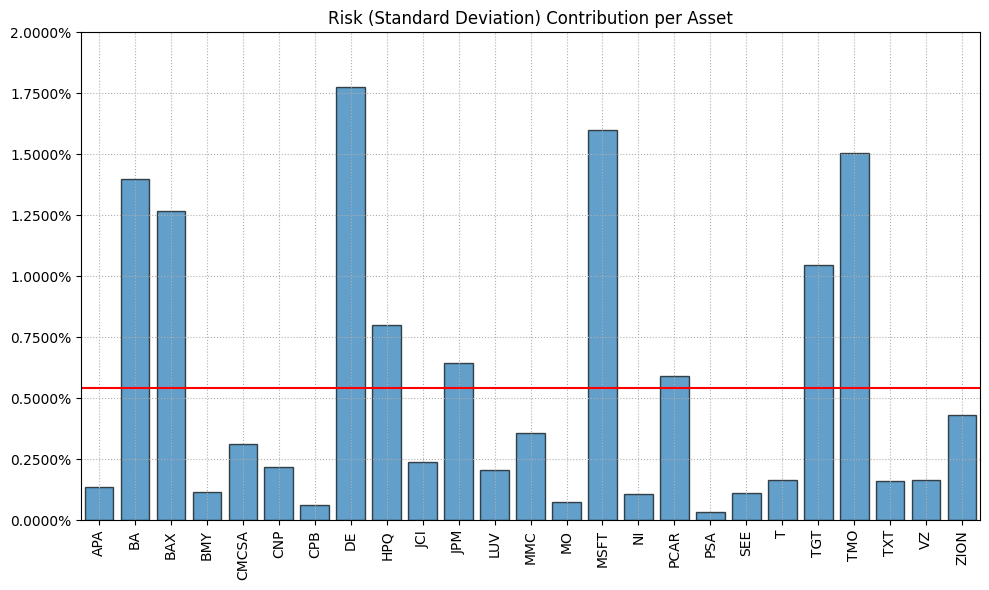

In [6]:
rp.plot_risk_con(
    w_rp, 
    cov=port.cov, 
    returns=port.returns, 
    height=6,
    width=10
)

The risk contribution plot helps us understand which assets contribute most to portfolio risk. It uses the asset weights, covariance matrix, and returns to calculate and visualize risk distribution.

### Your next steps

Try modifying the list of assets to include different companies or sectors. You can also adjust the constraints to see how they affect the optimal portfolio allocation. Experiment with different optimization models and risk measures to explore other portfolio strategies.

<a href="https://pyquantnews.com/">PyQuant News</a> is where finance practitioners level up with Python for quant finance, algorithmic trading, and market data analysis. Looking to get started? Check out the fastest growing, top-selling course to <a href="https://gettingstartedwithpythonforquantfinance.com/">get started with Python for quant finance</a>. For educational purposes. Not investment advise. Use at your own risk.